In [1]:
!pip install pandas numpy matplotlib seaborn

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# read csv using pandas
df = pd.read_csv("quiz_1.csv")
df.get("StockCode")[0] == "22423" # kukira int ternyata string

True

In [88]:
# 2.A Get data with StockCode == 22423
df = df.query('StockCode == "22423"')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2,10/23/2011 14:40,12.75,18005,United Kingdom
120,555650,22423,REGENCY CAKESTAND 3 TIER,3,6/6/2011 13:48,12.75,14156,EIRE
466,581279,22423,REGENCY CAKESTAND 3 TIER,6,12/8/2011 11:35,12.75,12437,France
804,541282,22423,REGENCY CAKESTAND 3 TIER,2,1/17/2011 12:31,12.75,17690,United Kingdom
1338,544929,22423,REGENCY CAKESTAND 3 TIER,16,2/24/2011 18:14,10.95,15189,United Kingdom


In [89]:
# 2.B Get ean, median, mode
CentralTendacy = {}
CentralTendacy['Mean'] = df['Quantity'].mean()
CentralTendacy['Median'] = df['Quantity'].median()
CentralTendacy['Mode'] = df['Quantity'].mode()[0]
CentralTendacy

{'Mean': 6.716049382716049, 'Median': 2.0, 'Mode': 1}

In [90]:
# 2.C Get q1 (min), q2, q3, q4 (max)
df["Quantity"].describe()

count    162.000000
mean       6.716049
std       22.383853
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      272.000000
Name: Quantity, dtype: float64

In [35]:
# 2.C Get iqr
q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)
iqr = q3 - q1
iqr

3.0

In [74]:
# 2. D compute z-score for quantity, i quantity to ascending to make it easier to understand about z-score
# i choose z-score method, because z-score is indicate how much the value identical to mean
# there is many of method to eliminate outlier, like, iqr-distance, quantile-filter
# reference : https://www.investopedia.com/terms/z/zscore.asp
test = df.sort_values(['Quantity'], ascending=[False])
test["Quantity_Z"] = (test["Quantity"] - test["Quantity"].mean())/test["Quantity"].std()
test[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Z
37084,538191,22423,REGENCY CAKESTAND 3 TIER,272,12/10/2010 10:49,10.95,15061,United Kingdom,11.851577
31482,581179,22423,REGENCY CAKESTAND 3 TIER,64,12/7/2011 15:43,10.95,12471,Germany,2.559164
5374,544081,22423,REGENCY CAKESTAND 3 TIER,32,2/15/2011 15:49,10.95,17819,United Kingdom,1.129562
27841,560038,22423,REGENCY CAKESTAND 3 TIER,32,7/14/2011 14:08,10.95,12709,Germany,1.129562
24548,563614,22423,REGENCY CAKESTAND 3 TIER,32,8/18/2011 8:51,10.95,12415,Australia,1.129562
34917,577718,22423,REGENCY CAKESTAND 3 TIER,32,11/21/2011 12:19,10.95,16013,United Kingdom,1.129562
3170,553551,22423,REGENCY CAKESTAND 3 TIER,20,5/17/2011 16:23,5.00,13631,United Kingdom,0.593461
29717,565380,22423,REGENCY CAKESTAND 3 TIER,16,9/2/2011 15:20,10.95,14463,United Kingdom,0.414761
28374,539275,22423,REGENCY CAKESTAND 3 TIER,16,12/16/2010 15:34,10.95,13408,United Kingdom,0.414761
28710,573320,22423,REGENCY CAKESTAND 3 TIER,16,10/30/2011 10:29,10.95,15513,United Kingdom,0.414761


In [77]:
# 2. D Reference : https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
before = len(test["Quantity"])
test.drop(test.loc[test['Quantity_Z'] > 3].index, inplace=True)
after = len(test["Quantity"])
outlier = before - after
outlier # just one outlier

1

<AxesSubplot:ylabel='Frequency'>

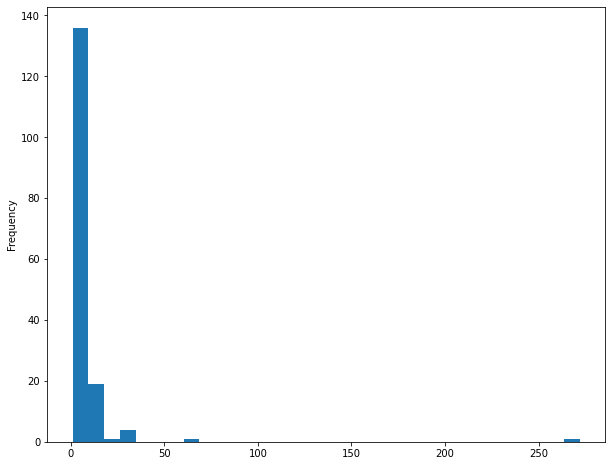

In [87]:
# 2.E Histogram
df["Quantity"].max()
df["Quantity"].plot.hist(bins=32, figsize=(10, 8))

In [107]:
# 3.A Group by and count country
df = df.query('StockCode == "22423"')
df.groupby(["Country"]).count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,1,1,1,1,1,1,1
Belgium,2,2,2,2,2,2,2
EIRE,6,6,6,6,6,6,6
France,5,5,5,5,5,5,5
Germany,5,5,5,5,5,5,5
Greece,1,1,1,1,1,1,1
Norway,2,2,2,2,2,2,2
United Kingdom,140,140,140,140,140,140,140


In [108]:
# 3.B Get Percentage of each country
df.groupby('Country').count() * 100 / len(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284
Belgium,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568
EIRE,3.703704,3.703704,3.703704,3.703704,3.703704,3.703704,3.703704
France,3.086420,3.086420,3.086420,3.086420,3.086420,3.086420,3.086420
Germany,3.086420,3.086420,3.086420,3.086420,3.086420,3.086420,3.086420
Greece,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284,0.617284
Norway,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568
United Kingdom,86.419753,86.419753,86.419753,86.419753,86.419753,86.419753,86.419753


<AxesSubplot:ylabel='StockCode'>

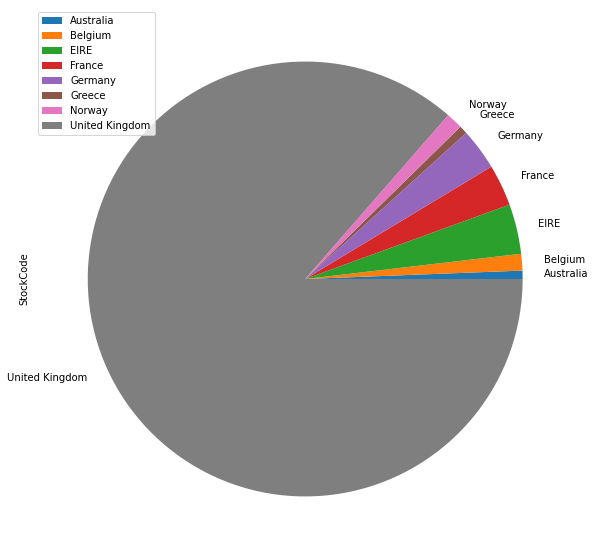

In [112]:
# 3.A && 3.B
df.groupby(['Country']).count().plot(kind='pie', y='StockCode', figsize=(10,10))

In [114]:
last = pd.read_csv("quiz_1.csv")
last.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2,10/23/2011 14:40,12.75,18005,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1,9/29/2011 15:57,4.95,17813,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4,10/30/2011 11:34,4.15,12483,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12,5/5/2011 15:08,1.25,12576,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24,10/20/2011 13:37,3.39,15587,United Kingdom


In [127]:
# 3.C
top_5 = last.groupby('StockCode').count().sort_values(["InvoiceDate"], ascending=False)[:5]
top_5 = top_5.rename(columns={'InvoiceNo': 'Total'})
top_5 = top_5.filter(['StockCode', 'Total'])
top_5

,Total
StockCode,
85099B,187
85123A,175
22423,162
84879,150
47566,140
